In [1]:
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('mushroom.csv')

In [3]:
df.head()

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245


In [4]:
df.shape

(2000, 26)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   cap_shape                 2000 non-null   object 
 2   cap_surface               2000 non-null   object 
 3   cap_color                 2000 non-null   object 
 4   bruises                   2000 non-null   object 
 5   odor                      2000 non-null   object 
 6   gill_attachment           2000 non-null   object 
 7   gill_spacing              2000 non-null   object 
 8   gill_size                 2000 non-null   object 
 9   gill_color                2000 non-null   object 
 10  stalk_shape               2000 non-null   object 
 11  stalk_root                2000 non-null   object 
 12  stalk_surface_above_ring  2000 non-null   object 
 13  stalk_surface_below_ring  2000 non-null   object 
 14  stalk_co

In [6]:
df.isnull().sum().sum()

np.int64(0)

In [7]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in df.columns:
    df[col] = le.fit_transform(df[col])

In [8]:
X = df.drop('class', axis=1)
y = df['class']

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.2, random_state=42, stratify=y
)

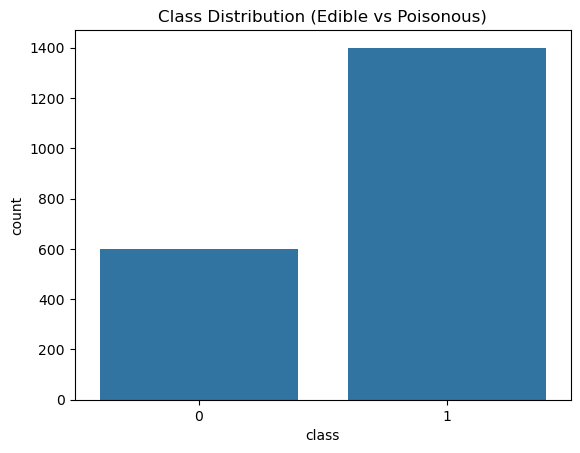

In [10]:
sns.countplot(x=y)
plt.title('Class Distribution (Edible vs Poisonous)')
plt.show()

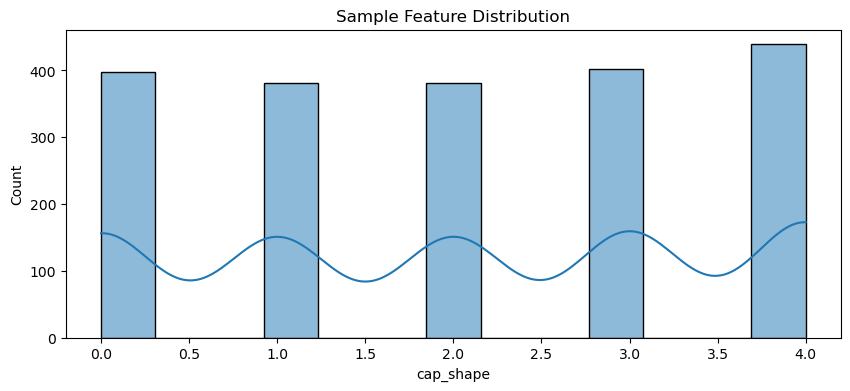

In [11]:
plt.figure(figsize=(10,4))
sns.histplot(df.iloc[:,1], kde=True)
plt.title('Sample Feature Distribution')
plt.show()

In [12]:
from sklearn.svm import SVC

svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train, y_train)

SVC(kernel='linear')

In [13]:
y_pred = svm_linear.predict(X_test)

In [14]:
from sklearn.metrics import accuracy_score, classification_report

print('Accuracy:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, zero_division=0))


Accuracy: 0.7
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       120
           1       0.70      1.00      0.82       280

    accuracy                           0.70       400
   macro avg       0.35      0.50      0.41       400
weighted avg       0.49      0.70      0.58       400



In [15]:
import numpy as np

print("Actual classes in test:", np.unique(y_test))
print("Predicted classes:", np.unique(y_pred))

Actual classes in test: [0 1]
Predicted classes: [1]


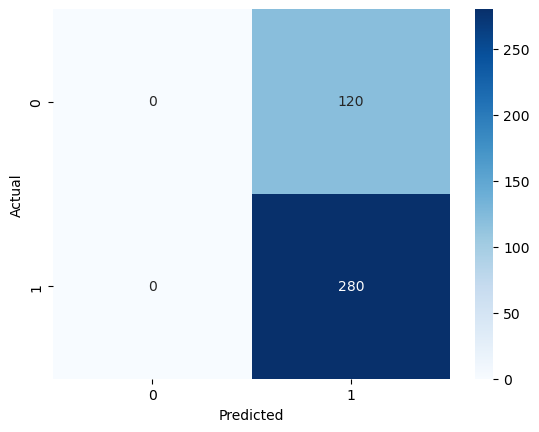

In [16]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [17]:
kernels = ['linear', 'poly', 'rbf']

for k in kernels:
    svm = SVC(kernel=k)
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    print(f'Kernel: {k}, Accuracy: {accuracy_score(y_test, y_pred):.4f}')

Kernel: linear, Accuracy: 0.7000
Kernel: poly, Accuracy: 0.7000
Kernel: rbf, Accuracy: 0.7000


In [18]:
from sklearn.model_selection import GridSearchCV

param_grid = {
'C': [0.1, 1, 10],
'gamma': ['scale', 'auto'],
'kernel': ['rbf']
}

grid = GridSearchCV(SVC(), param_grid, cv=5)
grid.fit(X_train, y_train)

grid.best_params_

{'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}